In [8]:
import numpy as np
import numpy.linalg as la
import numpy.random as rand
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import NSMap as ns

%load_ext autoreload
%autoreload 2

# Linear Different Nonstationarity Types
Test how NSMap does for simple linear systems.


In [19]:
# General function which runs the simulations for all model types
def runSimulation(f, filename, N_replicates = 100, E_max = 8):
    results = np.array([ns.get_delta_agg(f(), E_max, return_forecast_skill=True)
                        for i in range(int(N_replicates))])
    np.savetxt(f"../results/linear_results/{filename}.csv", results, fmt="%0.4f,%0.4f,%0.4f")

In [20]:
length = 200
E_max = 8
N_replicates = 100

In [21]:
# Stationary
def generate_stationary():
    theta = lambda t: np.pi / 6
    x0 = rand.random(1)[0] * 2 * np.pi
    return np.sin(theta(0) * np.arange(length) + x0) * np.sqrt(2) + rand.normal(0,0.1,length)

In [23]:
runSimulation(generate_stationary, "linear_stationary")

KeyboardInterrupt: 

In [ ]:
# Increasing Mean

def generate_mean_change():
    x0 = rand.random(1)[0] * 2 * np.pi
    theta = np.pi / 6
    return np.sqrt(2) * np.sin(theta * np.arange(length) + x0) + np.linspace(0,1,num=length) + rand.normal(0, 0.1, length)

In [ ]:
runSimulation(generate_mean_change, "linear_mean_change")

In [ ]:
# Increasing Amplitude
def generate_variance_change():
    x0 = rand.random(1)[0] * 2 * np.pi
    theta = np.pi / 6 # (0.5+t)*np.pi/6
    # ts = np.linspace(0.1,1,num=length) * (np.sqrt(2) * np.sin(theta * np.arange(length)) + rand.normal(0, 0.1, length))
    # ts = np.array([rand.normal(0,v) for v in np.linspace(2,8,num=200)])
    ts = np.linspace(1,2,num=length) * np.sqrt(2) * np.sin(theta * np.arange(length) + x0) + rand.normal(0, 0.1, length)
    
    return ts

In [ ]:
runSimulation(generate_variance_change, "linear_variance_change")

In [ ]:
# Increasing Oscillation Frequency
def generate_speed_change():
    x0 = rand.random(1)[0] * 2 * np.pi
    theta = lambda t: (0.5+t)*np.pi/6
    ts = np.sqrt(2) * np.sin(theta(np.linspace(0,1,num=length)) * np.arange(length) + x0) + rand.normal(0, 0.1, length)
    return ts

In [ ]:
runSimulation(generate_speed_change, "linear_speed_change")

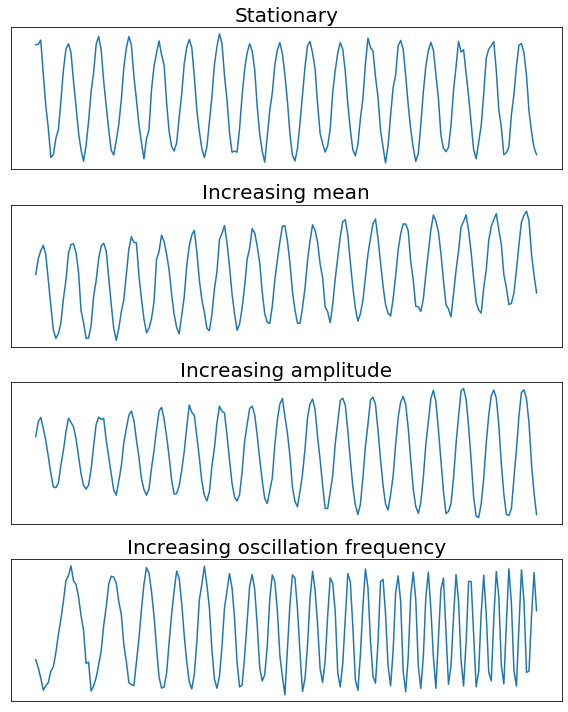

In [18]:
fig, ax = plt.subplots(4,figsize=(8,10))

ax[0].plot(generate_stationary())
ax[0].set_title("Stationary", fontsize = 20)
ax[1].plot(generate_mean_change())
ax[1].set_title("Increasing mean", fontsize = 20)
ax[2].plot(generate_variance_change())
ax[2].set_title("Increasing amplitude", fontsize = 20)
ax[3].plot(generate_speed_change())
ax[3].set_title("Increasing oscillation frequency", fontsize = 20)

for i in range(4):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
plt.tight_layout()
plt.savefig("../PDF_figures_tables/example_series/Figure_S1.pdf", format="pdf", bbox_inches="tight")